Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 27.11it/s]


          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm          0.571232  568.758184 -545.889890     inf      0.043859   
chi2             0.571836  567.911171 -545.776894     inf      0.044926   
gamma            0.571836  567.911161 -545.776894     inf      0.044926   
norm             0.583276  565.159907 -548.330232     inf      0.071489   
rayleigh         0.620450         inf -541.719200     inf      0.125688   

          ks_pvalue  
lognorm    0.980619  
chi2       0.975533  
gamma      0.975533  
norm       0.618862  
rayleigh   0.062253  
{'lognorm': {'s': 0.14616687492159153, 'loc': -7.6842817627528035, 'scale': 17.344412595618948}}
22.058401026893478


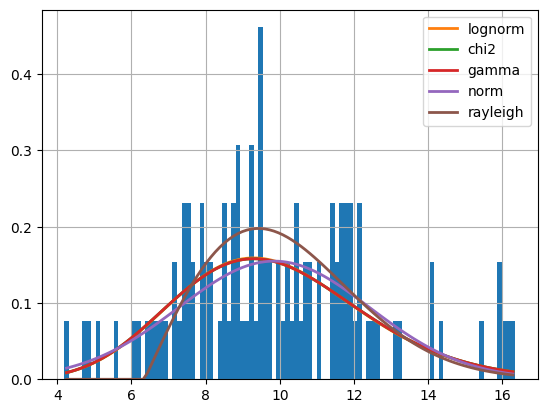

In [ ]:
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions
import scipy.stats as stats

# Fitter python package was used to find the best fitting distribution in terms of the RSS error of potential fits (lognormal found to be best)
# In practice, recent retrievals would be compared to the distribution and filtered based on a set threshold
# of 99th percentile to identify them as outliers. From this, further analysis would be done using the downscaling model, MODIS verification and finally
# thresholding at 99th percentile of the pixel values to identify the most thermally active regions of the region of interest. If these lie within 
# bounding areas/ key building interest, it's importance would be flagged accordingly.

path = "D:\Dissertation-2542000\RP3\Thermal\landsattabledata_updated.xlsx"
df = pd.read_excel(path)
df = df['diff_from_mean'].values


f = Fitter(df,
           distributions= get_common_distributions())
f.fit()
print(f.summary())
best = f.get_best(method = 'sumsquare_error')
best_vals = list(best.values())[0]
print(best)
percentile_value = stats.lognorm.ppf(0.99, s=best_vals['s'], scale=best_vals['scale'])
print(percentile_value)


In [6]:
# !pip install fitter
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions
import scipy.stats as stats

# Fitter python package was used to find the best fitting distribution in terms of the RSS error of potential fits (lognormal found to be best)
# In practice, recent retrievals would be compared to the distribution and filtered based on a set threshold
# of 99th percentile to identify them as outliers. From this, further analysis would be done using the downscaling model, MODIS verification and finally
# thresholding at 99th percentile of the pixel values to identify the most thermally active regions of the region of interest. If these lie within 
# bounding areas/ key building interest, it's importance would be flagged accordingly.

path = "D:\Dissertation-2542000\RP3\Thermal\landsattabledata_updated.xlsx"
df = pd.read_excel(path)
vals = df['diff_from_mean'].values


# f = Fitter(df,
#            distributions= get_common_distributions())
# f.fit()
# lognorm_params = f.fitted_param['lognorm']  # returns (s, loc, scale)

# s, loc, scale = lognorm_params

# # Now compute the 99th percentile using scipy
# percentile_99 = stats.lognorm.ppf(0.99, s=s, loc=loc, scale=scale)

# print("Lognorm 99th percentile:", percentile_99)


log_vals = np.log(vals[vals > 0])  # Only positive values

mu = np.mean(log_vals)
sigma = np.std(log_vals)

# Now get the 99th percentile from the fitted lognormal
percentile_99 = stats.lognorm.ppf(0.99, s=sigma, scale=np.exp(mu))
print("Lognorm 99th percentile (aligned with MATLAB):", percentile_99)

Lognorm 99th percentile (aligned with MATLAB): 15.557666405035581


         sumsquare_error         aic         bic  kl_div  ks_statistic  \
cauchy          5.436499  579.612581  583.733467     inf      0.093186   
norm            5.481287  522.329349  526.450235     inf      0.101335   
lognorm         5.481288  524.330084  530.511413     inf      0.101335   
gamma           5.484946  524.677209  530.858538     inf      0.101494   
chi2            5.488318  525.809426  531.990755     inf      0.103169   

         ks_pvalue  
cauchy    0.660457  
norm      0.556341  
lognorm   0.556340  
gamma     0.554349  
chi2      0.533523  
Best fit: {'cauchy': {'loc': 9.168950006026032, 'scale': 1.031780599856077}}
99th percentile for best distribution (cauchy): 42.000741044540916


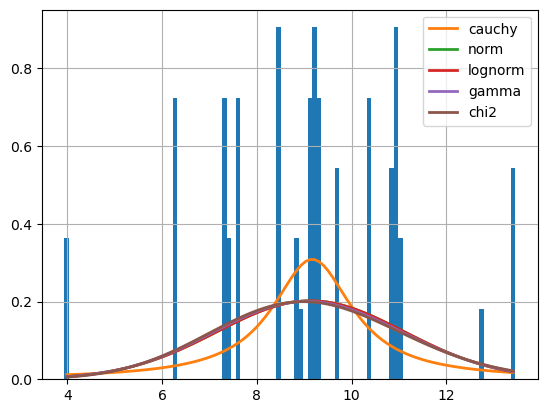

In [3]:
# !pip install fitter
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions
import scipy.stats as stats

# === Load the data ===
path = "D:\Dissertation-2542000\RP3\Thermal\landsattabledata_updated.xlsx"
df = pd.read_excel(path)
df = df['diff_from_mean'].values

# === Fit common distributions ===
f = Fitter(df, distributions=get_common_distributions())
f.fit()

# === Show fit summary ===
print(f.summary())

# === Get best fitting distribution ===
best = f.get_best(method='sumsquare_error')
print("Best fit:", best)

# === Extract distribution name and parameters ===
dist_name = list(best.keys())[0]
params = best[dist_name]

# === Access scipy's distribution object ===
distribution = getattr(stats, dist_name)

# === Prepare shape, loc, scale ===
shape_names = distribution.shapes.split(', ') if distribution.shapes else []
shape_params = [params[p] for p in shape_names] if shape_names else []

loc = params.get('loc', 0)
scale = params.get('scale', 1)

# === Compute the 99th percentile ===
percentile_value = distribution.ppf(0.99, *shape_params, loc=loc, scale=scale)
print(f"99th percentile for best distribution ({dist_name}): {percentile_value}")
